In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


The filename, directory name, or volume label syntax is incorrect.


In [5]:
df = pd.read_csv('./glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df.shape

(214, 10)

In [7]:
df.isna().sum()


RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
df.describe()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

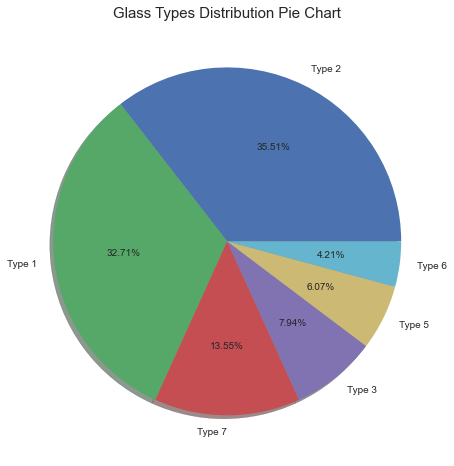

In [10]:
#representation of types

plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(10,8))

plt.pie(x=df["Type"].value_counts(),
    labels=["Type 2", "Type 1", "Type 7", "Type 3","Type 5","Type 6"],
    shadow=True,
    autopct="%1.2f%%",
)
plt.title("Glass Types Distribution Pie Chart", fontsize=15)
plt.show()

# Splitting the dataset

In [11]:
x=df.drop("Type", axis=1)
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [12]:
y=df["Type"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x,y, test_size=0.3, random_state=42)

In [15]:
len(x_train)

149

In [17]:
len(x_test)

65

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [20]:
RF_Accuracy = rfc.score(x_test, y_test)
print("Accuracy of Random Forests =",RF_Accuracy*100)

Accuracy of Random Forests = 78.46153846153847


In [21]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)
knn = KNeighborsClassifier(3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
KNN_Accuracy = knn.score(x_test, y_test)
print("Accuracy of KNN=", KNN_Accuracy*100)

Accuracy of KNN= 64.61538461538461


In [27]:
from sklearn.svm import SVC
classifier = SVC(kernel ='rbf', random_state=42)
classifier.fit(x_train, y_train)

SVC(random_state=42)

In [28]:
SVM_Accuracy = classifier.score(x_test, y_test)
print("Accracy of SVM ", SVM_Accuracy*100)

Accracy of SVM  35.38461538461539


In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [30]:
GBC_Accuracy = gbc.score(x_test, y_test)
print("Accuracy of Gradient Boosting = ", GBC_Accuracy*100)

Accuracy of Gradient Boosting =  80.0


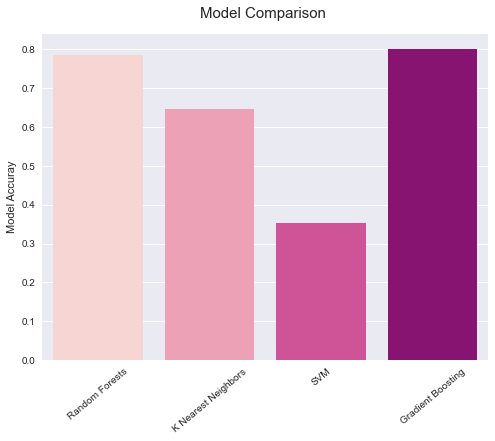

In [32]:
x=["Random Forests", "K Nearest Neighbors","SVM", "Gradient Boosting" ]

y=[RF_Accuracy, KNN_Accuracy,
  SVM_Accuracy, GBC_Accuracy]

plt.style.use("seaborn")
fig, ax=plt.subplots(figsize=(8,6))
sns.barplot(x=x, y=y, palette="RdPu");
plt.ylabel("Model Accuray")
plt.xticks(rotation=40)
plt.title("Model Comparison ", fontsize=15,y=1.03);